In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import jupyterthemes as jt
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
jieba.dt.cache_file = 'jieba.cache.lmspeech'

In [2]:
data = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 2/text mining revised/R/106107政治與兩岸關係類_run.xlsx")
data.fillna("",inplace=True)
lmspeech = list(data["發言內容"])
data.head()

,立委姓名,發言內容
0,孔文吉,主席、各位列席官員、各位同仁。從上一次質詢到現在差不多有幾個月了，現在兩岸的關係，目前具體的...
1,尤美女,\n主席、各位列席官員、各位同仁。我相信全國國人和政府單位都非常的關心李明哲事件，李太太所表...
2,王育敏,主席、各位列席官員、各位同仁。順便問一下，為什麼今天李大維部長又沒來？\n\n處理外交危機嗎...
3,王定宇,主席、各位列席官員、各位同仁。本席很快的問幾個問題。第一，川習會這次的重點當然是有關經貿和北...
4,王惠美,主席、各位列席官員、各位同仁。川習會成局的關鍵在於川普承認遵守所謂的一中政策，臺灣自然就不再...


In [3]:
#字典建立與斷字處理
jieba.set_dictionary('106107 dict.txt')
jieba.load_userdict('106107 dict.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech]
for idx, speech in enumerate(lmspeech):
    lmspeech[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])

Building prefix dict from c:\venv\workspace\source\Text mining\106107 dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.001 seconds.
Prefix dict has been built successfully.


In [4]:
#斷字結果匯出
swo=pd.DataFrame(columns=['發言內容'],data=lmspeech)
swo.to_excel("106107pncs.xlsx",encoding='UTF-8')

In [4]:
#Bag of Words
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(lmspeech)
cv_matrix

cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [5]:
#立委發言字彙分類
tf_vectorizer = CountVectorizer(token_pattern='[\u4e00-\u9fff]{2,6}',max_features=500)
dtm_tf = tf_vectorizer.fit_transform(lmspeech)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(lmspeech)

c:\python37\lib\site-packages\sklearn\feature_extraction\text.py:1808: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [6]:
#字彙分類數設定
lda_tf = LDA(n_components=3, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(n_components=3, random_state=0)

In [7]:
#字彙顯示個數設定
lda_tfidf = LDA(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [8]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape
print(topic_values)

[[3.18836505e-03 1.55019227e-01 8.41792408e-01]
 [2.86019123e-03 3.03581819e-03 9.94103991e-01]
 [3.35550833e-01 4.21946243e-01 2.42502924e-01]
 [9.47583637e-01 4.23454963e-02 1.00708672e-02]
 [5.29345265e-01 5.73324743e-02 4.13322261e-01]
 [4.90228262e-01 1.99626123e-02 4.89809126e-01]
 [2.43677386e-01 6.29066828e-01 1.27255787e-01]
 [9.90673569e-01 4.47490077e-03 4.85153018e-03]
 [9.29861629e-01 7.62528142e-03 6.25130891e-02]
 [9.93049442e-01 3.64814838e-03 3.30240941e-03]
 [9.81493218e-01 1.82523064e-02 2.54475962e-04]
 [2.72415731e-03 1.42791420e-01 8.54484423e-01]
 [7.20049069e-01 1.58558414e-01 1.21392518e-01]
 [2.79271027e-01 3.32647569e-03 7.17402497e-01]
 [9.98106241e-01 2.66987892e-04 1.62677143e-03]
 [7.13693414e-02 5.60678749e-01 3.67951910e-01]
 [7.20311862e-01 1.36448463e-01 1.43239675e-01]
 [2.91957854e-01 1.52425171e-03 7.06517895e-01]
 [9.50083693e-01 1.57436285e-04 4.97588706e-02]
 [1.01721318e-02 6.90660947e-01 2.99166922e-01]
 [1.19332407e-01 7.61850712e-01 1.188168

# <font color='red'>pyLDAvis visualization</font> 

In [8]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

c:\python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.037712  0.059116       1        1  57.246785
0     -0.070151 -0.048343       2        1  29.150772
2      0.107862 -0.010773       3        1  13.602443, topic_info=     Term        Freq       Total Category  logprob  loglift
82     兩岸  212.000000  212.000000  Default  30.0000  30.0000
173   太平島   69.000000   69.000000  Default  29.0000  29.0000
83    兩岸關  127.000000  127.000000  Default  28.0000  28.0000
485   陸委會  171.000000  171.000000  Default  27.0000  27.0000
195   川習會  163.000000  163.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
117    台灣   45.576264  733.102317   Topic3  -4.4640  -0.7830
382    美國   30.382535  473.157796   Topic3  -4.8696  -0.7506
159    報告   27.202249  280.748367   Topic3  -4.9801  -0.3392
32   中國大陸   24.100149  109.676183   Topic3  -5.1012   0.4796
137    回答   24.078845  127.964340   Topic3  -5.1021   0.3245

[196 rows x 6 columns], token_table=      Topic      Freq Term
term                      
7         1  0.436498   一直
7         2  0.341262   一直
7         3  0.214281   一直
11        1  0.106812   上個
11        2  0.071208   上個
...     ...       ...  ...
493       1  0.752172   預算
493       2  0.127128   預算
493       3  0.127128   預算
497       1  0.020236   食品
497       2  0.971315   食品

[367 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [10]:
#topic probabilities
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape
print(topic_values)
#取每個立委topic probability最大的主題(屬於哪類立場)
data['Topic'] = topic_values.argmax(axis=1)
data.head()
data.to_excel("test02.xlsx",index=False)

In [ ]:
#取每個立委各主題的topic probabilty
df = pd.DataFrame(topic_values)
df_rename = df.rename(columns = lambda x: str(x + 1))
tp_output = 'test02_tp.xlsx'
df_rename.to_excel(tp_output, index=False)

In [11]:
#匯出視覺化模型
vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.save_html(vis_data, 'outputplot.html')

c:\python37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [2]:
#import matplotlib.pyplot as plt
#from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Confusion Matrix

In [3]:
#Forming CM
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 3/2021 SCU seminar/modelevaluation.xlsx")
data02.fillna("",inplace=True)
actual= data02['posthoctestposition']
predicted= data02['position']
labels=[1,2,3]
cm= confusion_matrix(actual, predicted, labels=[1,2,3])
cm= pd.DataFrame(cm, index=labels, columns=labels)
cm

,1,2,3
1,14,14,2
2,8,25,2
3,8,22,15


AxesSubplot(0.125,0.125;0.62x0.755)


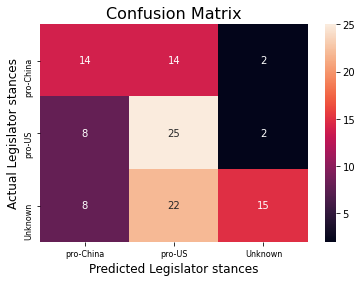

<Figure size 720x720 with 0 Axes>

In [4]:
#Plotting CM via Seaborn
ax= sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix',fontsize=16);
ax.set_xlabel('Predicted Legislator stances',fontsize=12)
ax.set_ylabel('Actual Legislator stances',fontsize=12);
ax.xaxis.set_ticklabels(['pro-China', 'pro-US', 'Unknown'],fontsize=8)
ax.yaxis.set_ticklabels(['pro-China', 'pro-US', 'Unknown'],fontsize=8)
plt.figure(figsize = (10,10))
print(ax)

AxesSubplot(0.125,0.125;0.62x0.755)


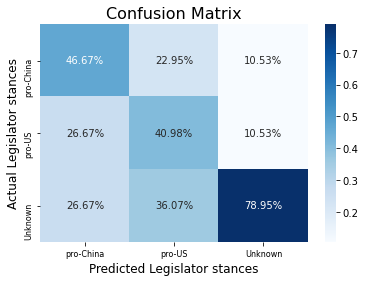

<Figure size 720x720 with 0 Axes>

In [6]:
#Plotting CM in probabilties
prob= sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');
prob.set_title('Confusion Matrix',fontsize=16);
prob.set_xlabel('Predicted Legislator stances',fontsize=12)
prob.set_ylabel('Actual Legislator stances',fontsize=12);
prob.xaxis.set_ticklabels(['pro-China', 'pro-US', 'Unknown'],fontsize=8)
prob.yaxis.set_ticklabels(['pro-China', 'pro-US', 'Unknown'],fontsize=8)
plt.figure(figsize = (10,10))
print(prob)

# Accuracy score

In [12]:
#Accuracy score
accuracy_score(actual, predicted)

0.4909090909090909

In [13]:
#Balanced accuracy score
balanced_accuracy_score(actual, predicted)

0.5047619047619047

# Recall score

In [14]:
#Recall score for each label
recall_score(actual, predicted, average=None, labels=labels)

array([0.46666667, 0.71428571, 0.33333333])

In [15]:
#Recall score
recall_score(actual, predicted, average=None, labels=labels).mean()

0.5047619047619047

# Precision score

In [16]:
#Precision score for each label
precision_score(actual, predicted, average=None, labels=labels)

array([0.46666667, 0.40983607, 0.78947368])

In [17]:
#Precision score
precision_score(actual, predicted, average=None, labels=labels).mean()

0.5553254721503212

# F1 score

In [18]:
#macro averaged f1-score
f1_score(actual, predicted, average= 'macro')

0.48541666666666666

In [19]:
#micro averaged f1-score
f1_score(actual, predicted, average= 'micro')

0.4909090909090909

In [20]:
#weighted averaged f1-score
f1_score(actual, predicted, average= 'weighted')

0.4847537878787879

In [21]:
#f1-score of every label
f1_score(actual, predicted, average= None)

array([0.46666667, 0.52083333, 0.46875   ])

# Classification report

In [22]:
matrix= classification_report(actual, predicted)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           1       0.47      0.47      0.47        30
           2       0.41      0.71      0.52        35
           3       0.79      0.33      0.47        45

    accuracy                           0.49       110
   macro avg       0.56      0.50      0.49       110
weighted avg       0.58      0.49      0.48       110

